In [6]:
import seaborn as sns
import pandas as pd
df = sns.load_dataset("tips")

# 1.Data collection 

In [8]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [9]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [16]:
df.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


# 2.Understanding the dataset

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [18]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [19]:
x = df["total_bill"]
y = df["tip"]

# 3.Stats sum

In [20]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


# 4.Relationship check

In [21]:
import matplotlib.pyplot as plt

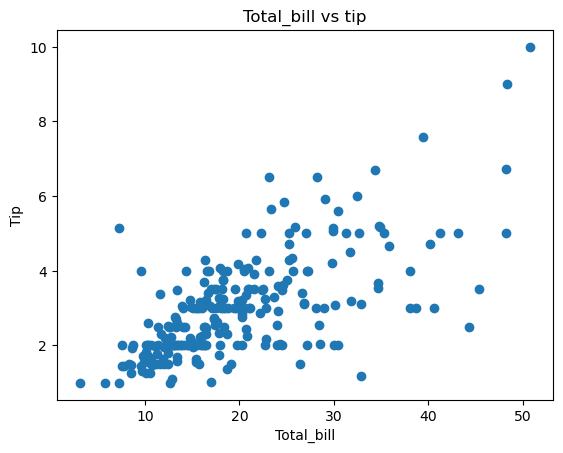

In [24]:
plt.scatter(x,y)
plt.xlabel("Total_bill")
plt.ylabel("Tip")
plt.title("Total_bill vs tip")
plt.show()

In [ ]:
#OBSERVATIONS
# 1.As the bill increases ,tip also increases
# 2.Relationship = Straight line(we can use linear regression) 



# 4.Feature & Target separation

In [27]:
x = df[["total_bill"]] #(Input should always be in 2D format)
y = df["tip"]

# 5.Train-test split

In [29]:
#why?---->A model must perform well on unseen data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# 6.Feature Standardization

In [31]:
# why? -->
# 1.Compare the coefficients fairly
# 2.Avoid the dominance of large values
# 3.Prepare for lasso/ridge

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

#Fit only on training data
#Prevents the data leakage


# 7.Train Linear Regression Model

In [34]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train_scaled,y_train)
print("Co-efficient(m):",model.coef_[0])
print("Intercept:",model.intercept_)

Co-efficient(m): 0.9357171400271828
Intercept: 3.0877948717948724


In [35]:
y_pred = model.predict(x_test_scaled)

# 8.Model Evalutation

In [37]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print("R2 Score:",r2)


R2 Score: 0.5449381659234664


In [39]:
from sklearn.metrics import mean_squared_error
import numpy as np
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print("MSE:",mse)
print("RMSE:",rmse)

MSE: 0.5688142529229538
RMSE: 0.7541977545199626


# 9.Visualize the best fit line

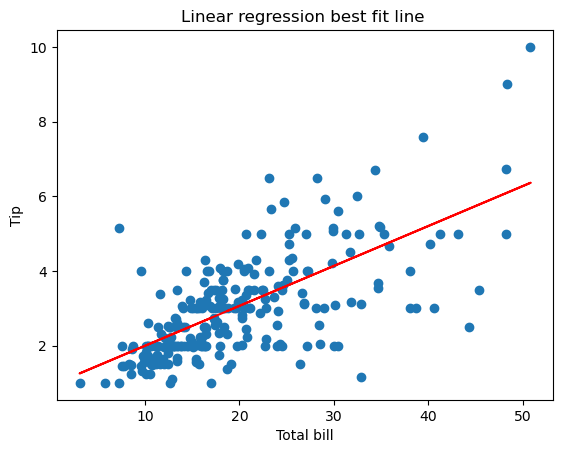

In [41]:
plt.scatter(x,y)
plt.plot(x,model.predict(scaler.transform(x)),color = "red")
plt.xlabel("Total bill")
plt.ylabel("Tip")
plt.title("Linear regression best fit line ")
plt.show()

# 10.Input-Output real time

In [45]:
bill_amount = float(input("Enter the bill amount:"))
bill_scaled = scaler.transform([[bill_amount]])
predict_tip = model.predict(bill_scaled)
print(f"Predicted tip amount : {predict_tip[0]:.2f}")

Predicted tip amount : 642.71


c:\Users\bojja\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Predicted tip amount : 65.10
